# 海洋模式学习初级阶段：损失问题
#### 整合J. Kaempf的Fortran和Scilab代码

## 1 显示时间导数向前迭代 explicit scheme

离散方程为:  <br/> 
$$ \frac{c^{n+1}-c^{n}}{\triangle t}=\kappa c^{n} $$  <br/> 
调整为: <br/> 
$$ c^{n+1}=(1-\triangle t \cdot \kappa)c^{n} $$   <br/> 
为了保证数值解稳定，需要满足条件： <br/> 
$$ \triangle t < \frac{1}{\kappa} $$ <br/> 

## 2 隐式时间导数向前迭代 implicit scheme

离散方程为： <br/> 
$$ \frac{c^{n+1}-c^{n}}{\triangle t}=\kappa c^{n+1} $$ <br/> 
调整为： <br/> 
$$ c^{n+1}=(1+\triangle t \cdot \kappa)c^{n} $$ <br/> 
此时，数值解稳定。

## 3 混合形式 hybrid scheme

离散方程为： <br/> 
$$ \frac{c^{n+1}-c^{n}}{\triangle t}=-\alpha \cdot \kappa \cdot c^{n+1}-(1-\alpha )\cdot \kappa \cdot c^{n} $$ <br/> 
调整为： <br/> 
$$ c^{n+1}=\frac{1-(1- \alpha) \cdot \triangle t \cdot \kappa}{1+\alpha \cdot \triangle t \cdot \kappa}c^{n} $$ <br/> 
当 $\alpha=1$ 时是隐式； <br/> <br/> 当 $\alpha=0$ 时是显示； <br/><br/> 当 $\alpha=0.5$ 时是半隐式。 <br/><br/> 

In [57]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
czero = 100
c=czero
kappa = 0.0001
dt = 3600

facmod1 = 1.0-dt*kappa
if facmod1<=0 :
    print("STABITY CRITERION ALERT: REDUCE TIME STEP")
    exit()   
facmod2 = 1.0/(1.+dt*kappa)
ntot = 24.0*3600./dt

cnmode1=np.empty(int(ntot))
cnmode1[:]=c

cnmode2=np.empty(int(ntot))
cnmode2[:]=c

cture=np.empty(int(ntot))
cture[:]=czero

fac025=(1-(1-0.25)*dt*kappa)/(1+0.25*dt*kappa)
cna025=np.empty(int(ntot))
cna025[:]=c

fac050=(1-(1-0.50)*dt*kappa)/(1+0.50*dt*kappa)
cna050=np.empty(int(ntot))
cna050[:]=c

fac075=(1-(1-0.75)*dt*kappa)/(1+0.75*dt*kappa)
cna075=np.empty(int(ntot))
cna075[:]=c

for i in (range(int(ntot)-1)):
    cnmode1[(i+1)]=cnmode1[i]*facmod1
    cnmode2[(i+1)]=cnmode2[i]*facmod2
    cna025[(i+1)]=cna025[i]*fac025
    cna050[(i+1)]=cna050[i]*fac050
    cna075[(i+1)]=cna075[i]*fac075
    cture[i+1]=czero*math.exp(-kappa*(i+1)*dt)
plotframe=pd.DataFrame({'true':cture,'ex':cnmode1,'im':cnmode2,'a025':cna025,'a050':cna050,'a075':cna075})

In [58]:
plotframe

,true,ex,im,a025,a050,a075
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,69.767633,64.000000,73.529412,66.972477,69.491525,71.653543
2,48.675226,40.960000,54.065744,44.853127,48.290721,51.342303
3,33.959553,26.214400,39.754223,30.039250,33.557959,36.788579
4,23.692776,16.777216,29.231047,20.118030,23.319937,26.360320
5,16.529889,10.737418,21.493417,13.473543,16.205380,18.888104
6,11.532512,6.871948,15.803983,9.023565,11.261366,13.533996
7,8.045961,4.398047,11.620576,6.043305,7.825695,9.697587
8,5.613476,2.814750,8.544541,4.047351,5.438195,6.948665
9,3.916390,1.801440,6.282751,2.710611,3.779085,4.978965


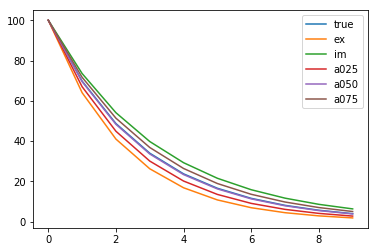

In [59]:
plotframe[0:10].plot()
plt.show()